In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# The following allows to save plots in SVG format.
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
def create_sinusoidal_df(
    amplitude = 2000.0,  # Amplitude of the price variations
    frequency = 0.01,  # Frequency of the price variations
    phase = 0.0,  # Phase shift of the price variations
    num_samples = 10000,  # Number of data samples
    data_shift = 20000, # shift the data up
    trendline_down = 5000, # shift the data down
    plot = False,
    ):
    """Create a dataframe with sinusoidal data"""

    # Generate the time axis
    t = np.linspace(0, 2 * np.pi * frequency * num_samples, num_samples)

    # Get the current datetime
    now = datetime.now()

    # Set hours, minutes, and seconds to zero
    now = now.replace(hour=0, minute=0, second=0, microsecond=0)

    # Generate timestamps for each day
    # timestamps = [now - timedelta(days=i) for i in range(num_samples)]
    timestamps = [now - timedelta(hours=i*4) for i in range(num_samples)]

    # Convert datetime objects to strings
    timestamps = [timestamps.strftime('%Y-%m-%d %H:%M:%S') for timestamps in timestamps]

    # Invert the order of the timestamps
    timestamps = timestamps[::-1]

    # Generate the sinusoidal data for prices
    sin_data = amplitude * np.sin(t + phase)
    sin_data += data_shift # shift the data up

    # shiwft sin_data up, to create trendline up
    sin_data -= np.linspace(0, trendline_down, num_samples)

    # Add random noise
    noise = np.random.uniform(0.95, 1.05, len(t))  # generate random noise
    noisy_sin_data = sin_data * noise  # add noise to the original data

    price_range = np.max(noisy_sin_data) - np.min(noisy_sin_data)

    # Generate random low and close prices
    low_prices = noisy_sin_data - np.random.uniform(0, 0.1 * price_range, len(noisy_sin_data))
    close_prices = noisy_sin_data + np.random.uniform(-0.05 * price_range, 0.05 * price_range, len(noisy_sin_data))

    # open prices usually are close to the close prices of the previous day
    open_prices = np.zeros(len(close_prices))
    open_prices[0] = close_prices[0]
    open_prices[1:] = close_prices[:-1]

    # high prices are always above open and close prices
    high_prices = np.maximum(open_prices, close_prices) + np.random.uniform(0, 0.1 * price_range, len(close_prices))

    # low prices are always below open and close prices
    low_prices = np.minimum(open_prices, close_prices) - np.random.uniform(0, 0.1 * price_range, len(close_prices))

    if plot:
        # Plot the price data
        plt.figure(figsize=(10, 6))
        plt.plot(t, noisy_sin_data, label='Noisy Sinusoidal Data')
        plt.plot(t, open_prices, label='Open')
        plt.plot(t, low_prices, label='Low')
        plt.plot(t, close_prices, label='Close')
        plt.plot(t, high_prices, label='High')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Fake Price Data')
        plt.legend()
        plt.grid(True)
        plt.show()

    # save the data to a CSV file with matplotlib as df[['open', 'high', 'low', 'close']
    df = pd.DataFrame({'timestamp': timestamps, 'open': open_prices, 'high': high_prices, 'low': low_prices, 'close': close_prices})
    return df

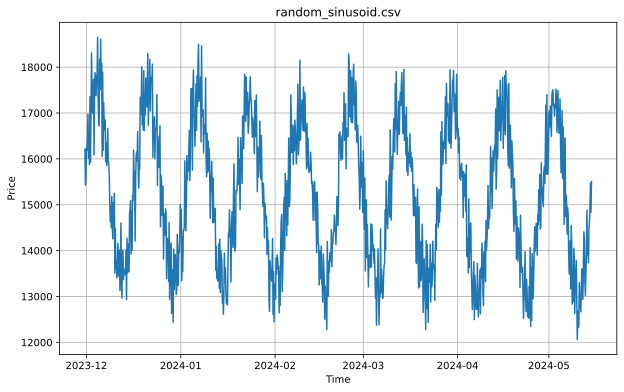

In [3]:
df = create_sinusoidal_df()

os.makedirs('Datasets', exist_ok=True)
df.to_csv(f'Datasets/random_sinusoid.csv')

df = pd.read_csv('Datasets/random_sinusoid.csv', index_col='timestamp', parse_dates=True)
df = df[['open', 'high', 'low', 'close']]
# limit to last 1000 data points
df = df[-1000:]

# plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['close'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('random_sinusoid.csv')
plt.grid(True)
plt.show()